In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('emails.csv')

In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
# spam 컬럼이 1이면 스팸, 0이면 스팸 아님

In [5]:
df.spam.unique()

array([1, 0])

sb.countplot() 특정컬럼의 중복 카운트

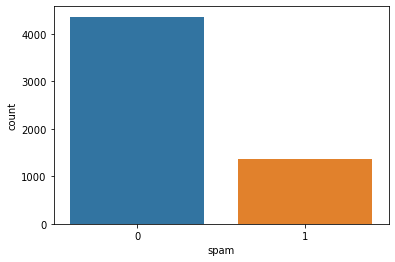

In [6]:
sb.countplot(data=df, x='spam')
plt.show()

In [ ]:
# 이메일의 문자열 길이 구해서 length 컬럼 만들기

In [3]:
df['length'] = df.text.str.len()

In [10]:
# 또는 apply() 함수 이용
df.text.apply(len)

0       1484
1        598
2        448
3        500
4        235
        ... 
5723    1189
5724    1167
5725    2131
5726    1060
5727    2331
Name: text, Length: 5728, dtype: int64

In [ ]:
#글자 길이 히스토그램 나타내기

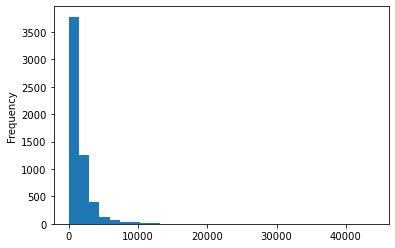

In [11]:
df['length'].plot(kind='hist', bins=30)
plt.show()

In [ ]:
# 파이차트로 스팸과 스팸이 아닌 것들 표시하기

In [4]:
pie_spam = df.spam.value_counts()

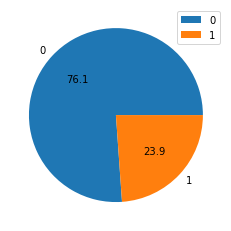

In [5]:
plt.pie(pie_spam, autopct='%.1f', labels=pie_spam.index)
#또는  plt.pie(pie_spam, autopct='%.1f', labels=['not spam', 'spam'])
plt.legend()
plt.show()


In [ ]:
# 스팸과 스팸이 아닌 것들만 따로 모으기

In [6]:
spam = df.loc[ df.spam == 1, ]

In [20]:
spam.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [7]:
ham = df.loc [ df.spam == 0,]

In [22]:
ham.head()

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535


구두점제거 string 불러오기

In [8]:
import string

In [9]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# 어떤 특정 문자열에서 string.punctuation에 있는 특수기호들을 이용해서 제거하기
def msg_remove(strings):
    punc_removed_list = []
    for char in strings:    
        if char not in string.punctuation:
            punc_removed_list.append(char)

    return punc_removed_list

In [26]:
test = "hello world, test.,, , i am happy for you!!~"

In [27]:
# 한줄로 표현
# punc_removed_list = [ char for char in strings if char not in string.punctuation ]


['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 't',
 'e',
 's',
 't',
 ' ',
 ' ',
 'i',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 'y',
 'o',
 'u']

STOPWORDS 제거 nltk 불러오기

In [10]:
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sgtocta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

In [35]:
# stopwords.words('english')
# 길어서 주석

In [13]:
stopList = stopwords.words('english')

In [ ]:
# 불용어 stopwords 있는지 확인 후 제거하기
# 먼저 위에서 구두점 punctuation 제거 후 사용


In [41]:
# 위의 구두점 제거 함수사용
result_msg_remove = msg_remove(test)

In [47]:
# join으로 한 문자열로 만들기 
joined_word = ''.join( result_msg_remove )

In [50]:
def msg_remove_stopword(strings):
    #중간에 split()으로 공백으로 분리해서 리스트로 만듬
    # lower()을 해서 소문자로 만들어서 비교
    punc_removed_join_clean = [ word for word in strings.split() if word.lower() not in stopList ]
    return punc_removed_join_clean

In [51]:
msg_remove_stopword(joined_word)

['hello', 'world', 'test', 'happy']

위의 함수를 합쳐서 pipelining 하기

In [14]:
def msg_cleaning(strings):
    punc_removed_list = [ char for char in strings if char not in string.punctuation ]
    punc_removed_joined = ''.join(punc_removed_list)

    #중간에 split()으로 공백으로 분리해서 리스트로 만듬
    # lower()을 해서 소문자로 만들어서 비교
    punc_removed_join_clean = [ word for word in punc_removed_joined.split() if word.lower() not in stopList ]
    
    return punc_removed_join_clean

이메일 내용을 cleaning 해보기

apply()

In [57]:
#apply함수 활용해서 사용자 함수 콜
df.text.apply(msg_cleaning)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

벡터라이징 하기 vectorize

CountVectorizer 불러오기

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer(analyzer=)

In [16]:
#객체생성
# 객체가 생성되기 전에 사용자 함수를 사용한 다음에 만들어 진다
# analyzer= 파라미터로 함수를 먼저 적용할 수 있다 (카운트 백터라이즈 init 되기전에 수행함)
vectorizer = CountVectorizer( analyzer = msg_cleaning)

In [ ]:
# 처음에 학습은 fit_transform ()
# 추가로 vectorizer를 사용할 때는 transform()만 사용
vectorizer.fit_transform(df.text)

In [17]:
# X로 만들어 주고, 추후 훈련시킴
X = vectorizer.fit_transform(df.text)

In [64]:
#vectorizer.get_feature_names()

toarray() 

In [18]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
X.toarray().shape

(5728, 37229)

training and modeling

In [19]:
y = df.spam

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state =123)

naive_bayes 모델링/ 불러오기

MultinomialNB

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
# 생성
nb_classifier = MultinomialNB()

In [24]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
nb_classifier.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
y_pred_nb = nb_classifier.predict(X_test)

컴퓨전매트릭스 confusion/불러오기

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test, y_pred_nb)

In [29]:
cm

array([[868,   8],
       [  3, 267]])

In [30]:
# 정확도 계산
(868+267) / cm.sum()

0.9904013961605584

WordCloud 활용

In [83]:
# 설치해보기
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

코멘트 추가 예측해보기 predict

In [ ]:
# 추가로 예측할 때는 
# 기존의 데이터 처리했던 것을 똑같이 처리해줘야함
# 문자열을 vectovectorize 를 해줘야함 (구두점, 불용어 제거 포함)

In [33]:
test1 = [ "give me money" ]

In [34]:
# vectorizer 시키기, transform()으로 기존에 학습한 것으로 함
test1_countvectorizer = vectorizer.transform(test1)

In [37]:
# Naive Bayes로 다시 예측하기
test1_predict = nb_classifier.predict(test1_countvectorizer)

In [38]:
test1_predict

array([1])

In [64]:
test2= ['hello. dinner was so bad. so I want my money back.']


In [65]:
test2_countvectorizer = vectorizer.transform(test2)

In [66]:
test2_pred = nb_classifier.predict(test2_countvectorizer)

In [67]:
test2_pred

array([0])